In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# loading a data set from seaborn for demonstration

In [2]:
df=sns.load_dataset('taxis')

In [3]:
df.sample(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3820,2019-03-02 08:27:24,2019-03-02 08:29:22,5,0.28,3.5,0.00,0.00,6.80,yellow,cash,Union Sq,Gramercy,Manhattan,Manhattan
4085,2019-03-07 14:38:13,2019-03-07 14:48:42,1,1.00,8.0,0.00,0.00,11.30,yellow,cash,Yorkville West,Upper East Side North,Manhattan,Manhattan
4093,2019-03-02 11:51:45,2019-03-02 11:56:15,1,0.73,5.0,0.00,0.00,8.30,yellow,cash,West Village,SoHo,Manhattan,Manhattan
4583,2019-03-14 11:47:01,2019-03-14 12:14:15,1,2.40,17.0,0.00,0.00,20.30,yellow,cash,Lenox Hill East,Kips Bay,Manhattan,Manhattan
5196,2019-03-09 19:07:42,2019-03-09 19:12:27,2,1.27,6.0,0.00,0.00,9.30,yellow,cash,Lincoln Square East,Upper West Side North,Manhattan,Manhattan
864,2019-03-20 10:03:57,2019-03-20 10:06:02,2,0.40,3.5,2.00,0.00,8.80,yellow,credit card,Upper East Side South,Upper East Side South,Manhattan,Manhattan
6382,2019-03-05 18:36:00,2019-03-05 18:41:41,1,0.91,5.5,2.00,0.00,11.25,green,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens
5416,2019-03-29 22:58:39,2019-03-29 23:26:09,5,11.25,33.5,8.61,5.76,51.67,yellow,credit card,Union Sq,North Corona,Manhattan,Queens
5493,2019-03-06 12:14:00,2019-03-06 12:14:00,1,0.00,10.0,0.00,0.00,10.00,green,credit card,NaN,NaN,NaN,NaN
1234,2019-03-15 16:03:39,2019-03-15 16:13:15,1,1.76,8.5,1.50,0.00,14.30,yellow,credit card,SoHo,East Chelsea,Manhattan,Manhattan


In [4]:
df.isnull().mean()*100

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


## OUT Lier Treatment

## boxplot

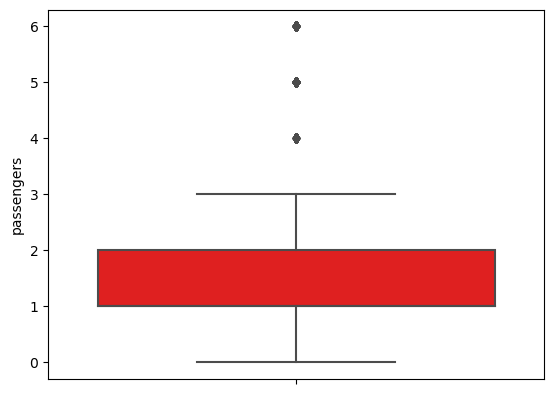

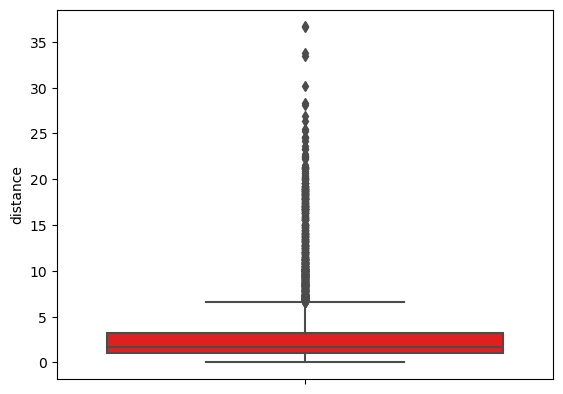

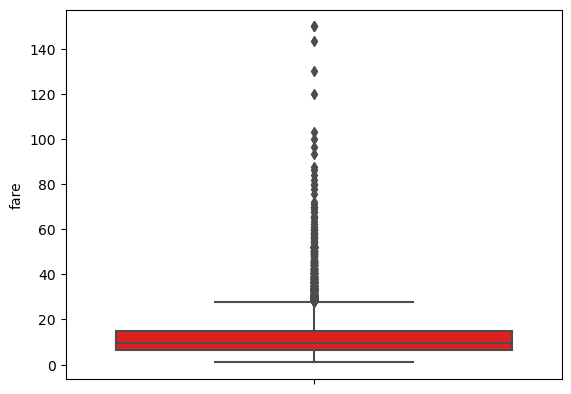

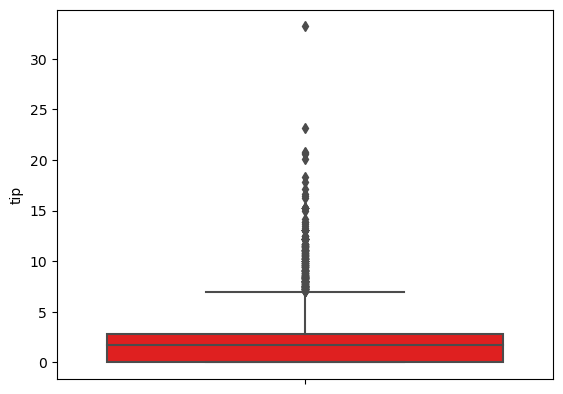

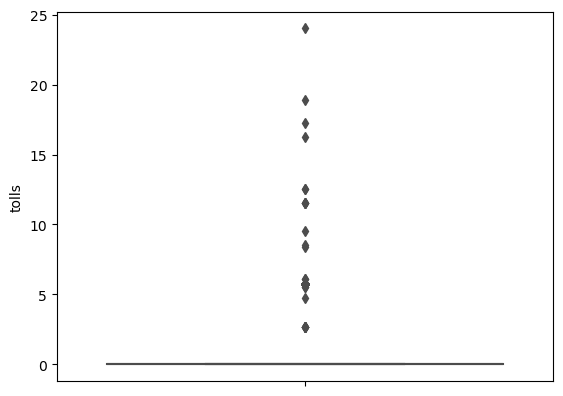

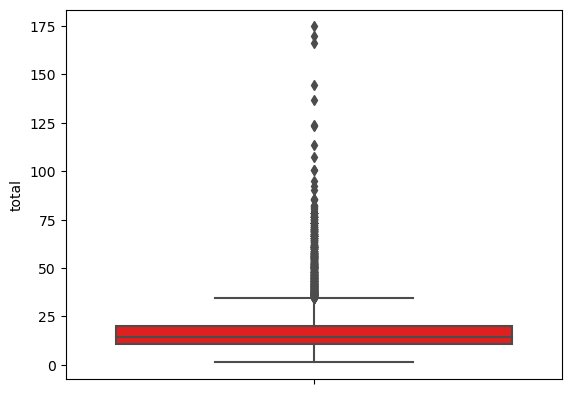

In [6]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='red')
        plt.show();

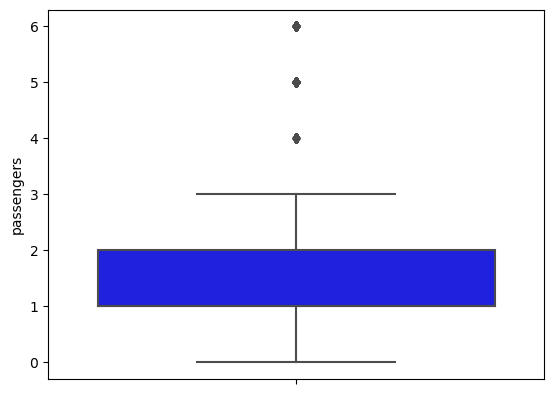

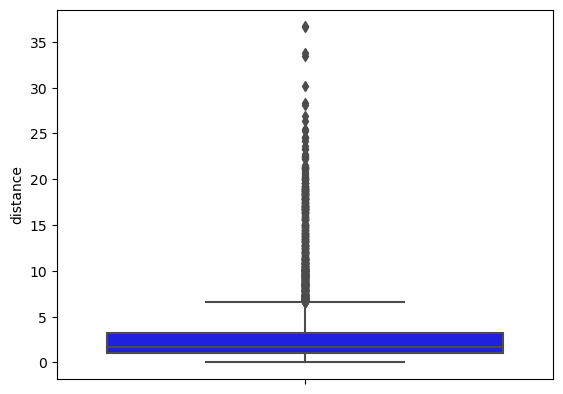

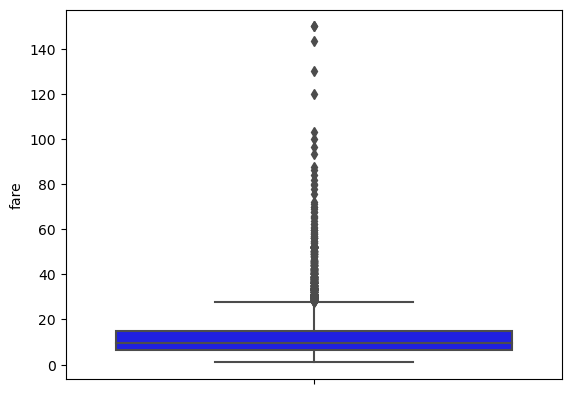

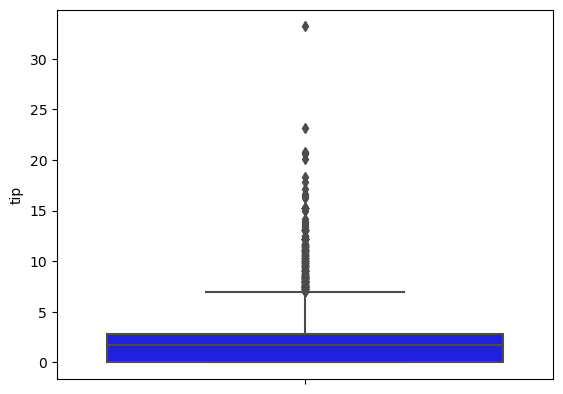

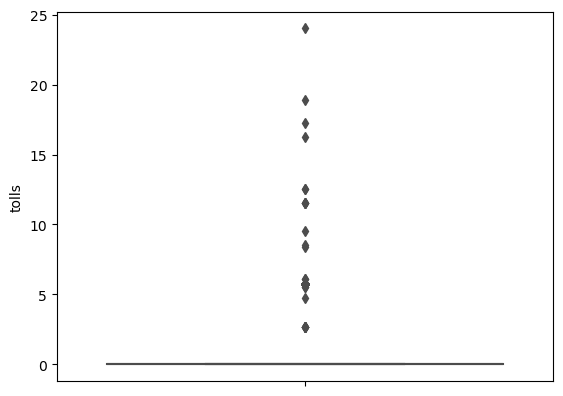

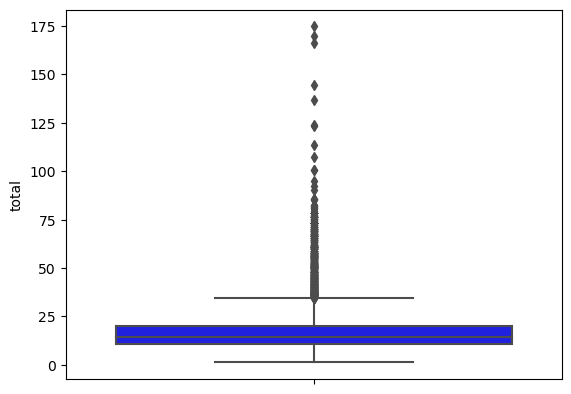

In [16]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='blue')
        plt.show();

## setting oulirer limit

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [27]:
for column in df.columns:
     if df[column].dtype !='object':
            UL,LL=outlier_limit(df[column])
            df[column]=np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])
       

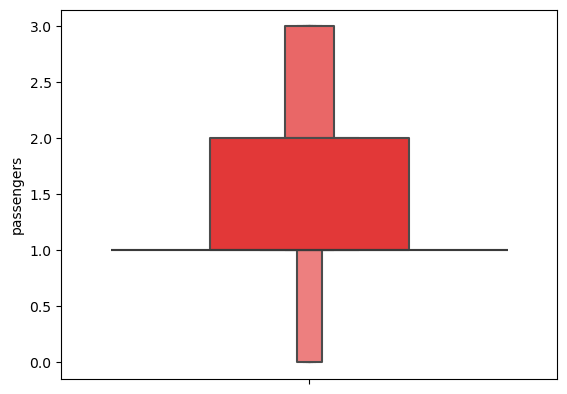

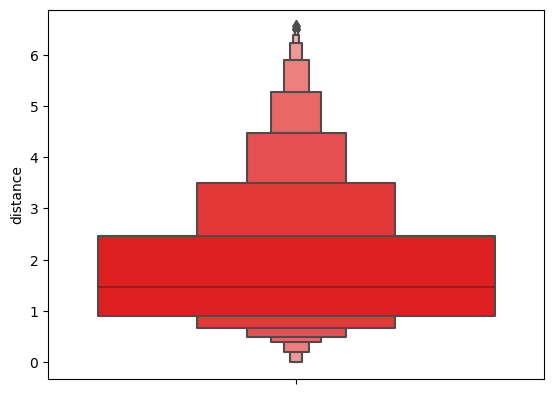

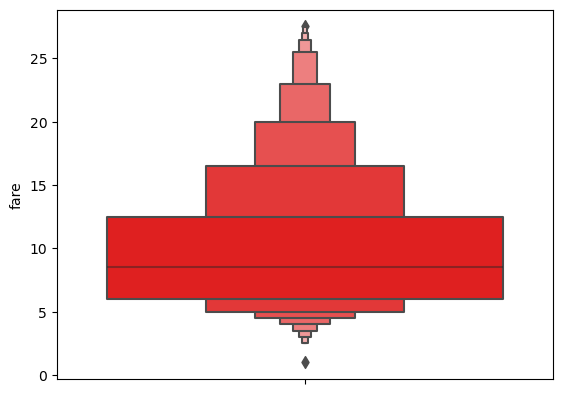

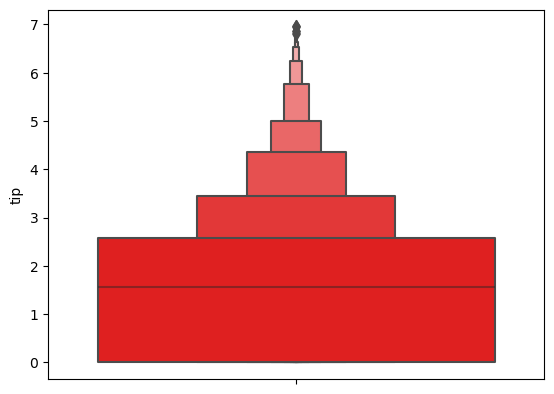

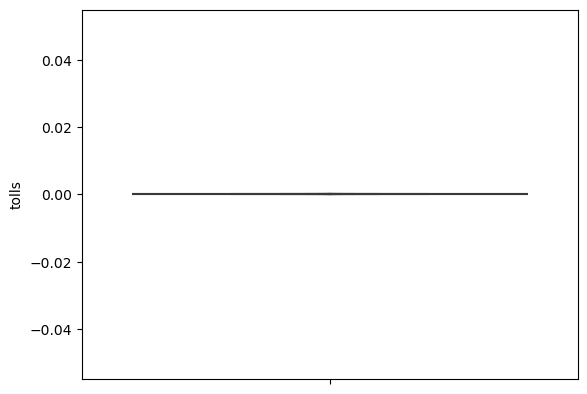

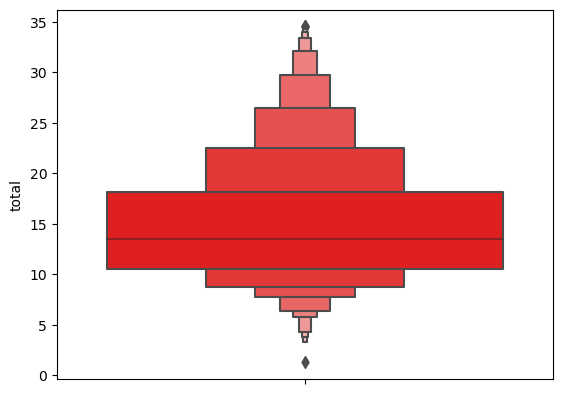

In [29]:
for i in df.columns:
    if df[i].dtype !='object':
        sns.boxenplot(y=df[i],color='red')
    plt.show();